<a href="https://colab.research.google.com/github/nassimch12/ML-Work/blob/notebook%2Fstudent-depression-modeling/DepressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Mini Projet**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score

# **Student Depression Dataset**

Develop a model to predict the risk of depression based on demographics, academics, lifestyle, and mental health factors.

In [ ]:
student_data = pd.read_csv('Depression Student Dataset.csv')

In [ ]:
student_data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


## **Data Cleaning**

In [ ]:
print("\nMissing Values:")
print(student_data.isnull().sum())


Missing Values:
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Identify categorical columns
categorical_cols = student_data.select_dtypes(include=['object']).columns

# Iterate through categorical columns and encode them
for col in categorical_cols:
    student_data[col] = le.fit_transform(student_data[col])

# Display the encoded DataFrame
student_data.head()


,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,1,1,1,9,2,1,0
1,1,28,4.0,5.0,0,0,1,7,1,1,0
2,1,25,1.0,3.0,0,2,1,10,4,0,1
3,1,23,1.0,4.0,3,2,1,7,2,1,0
4,0,31,1.0,5.0,3,0,1,4,2,1,0


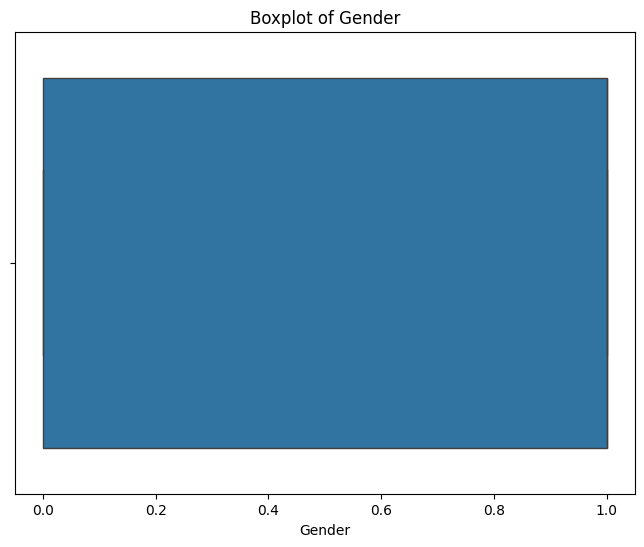

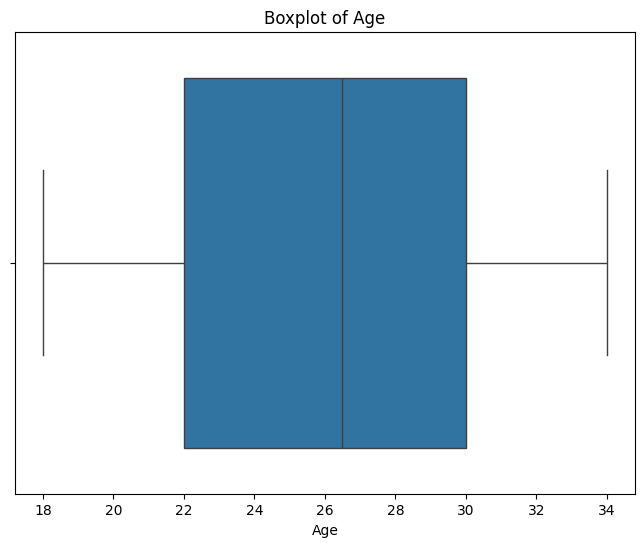

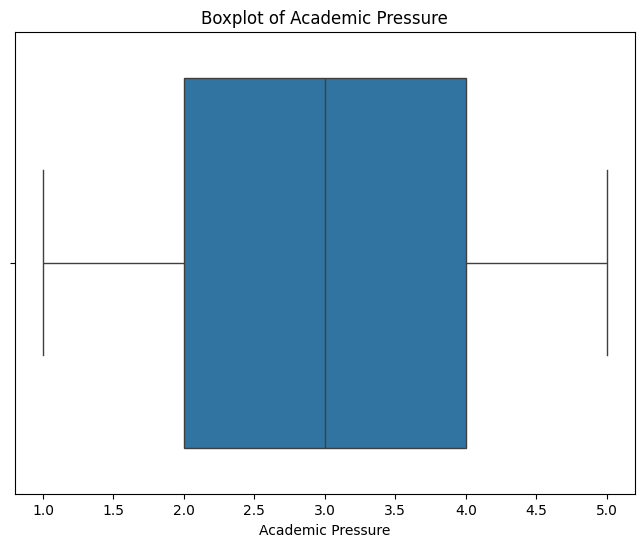

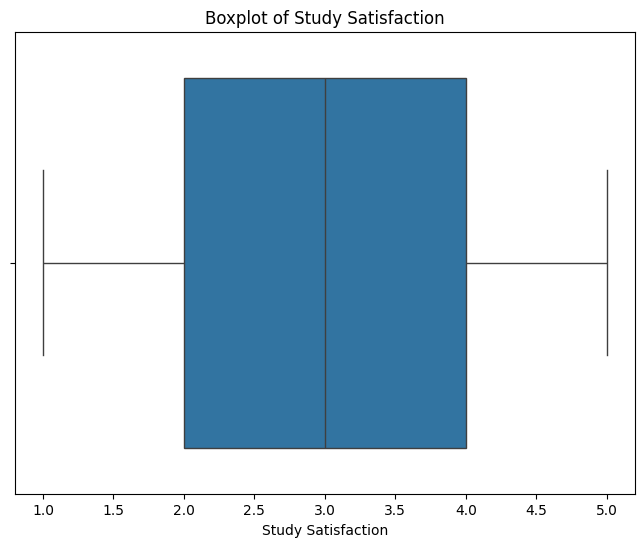

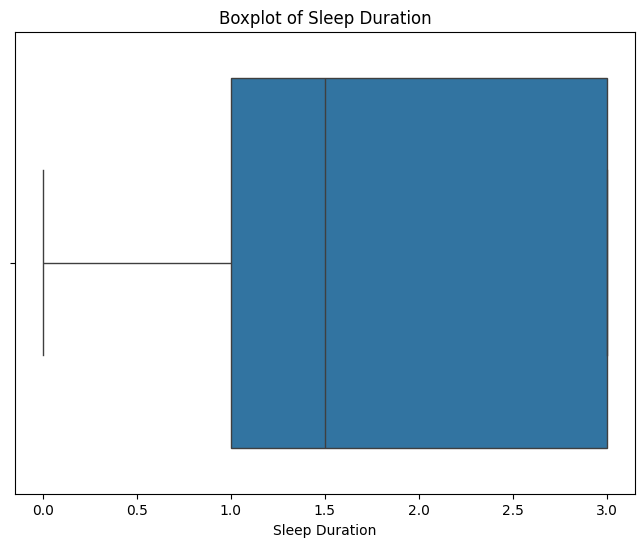

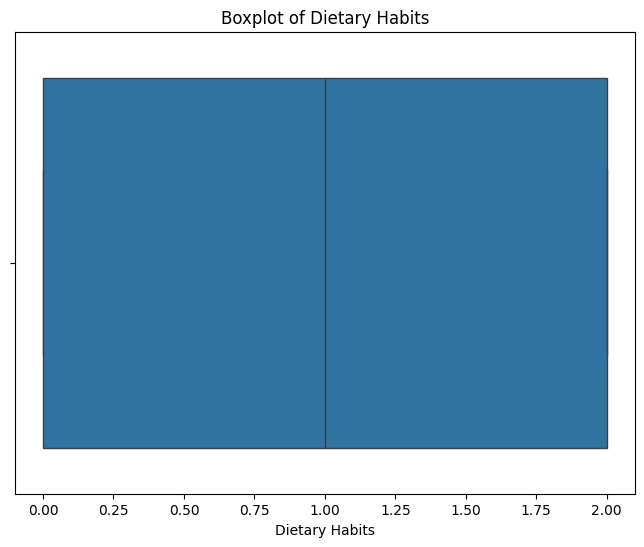

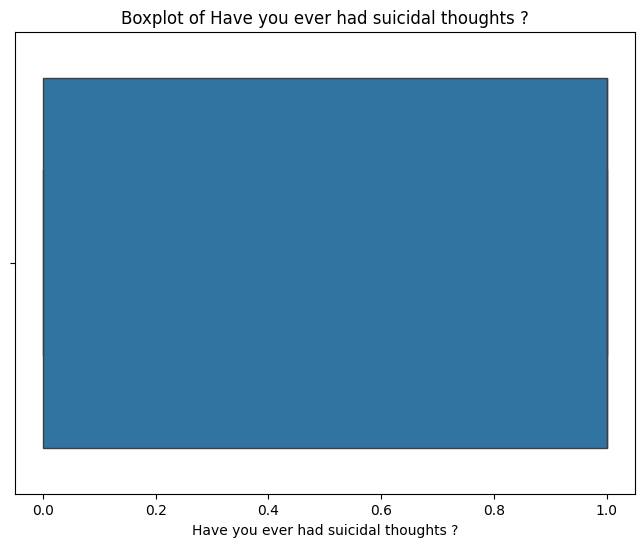

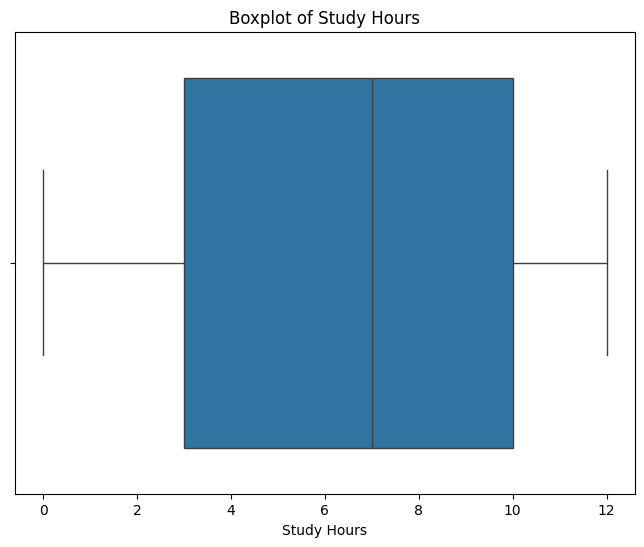

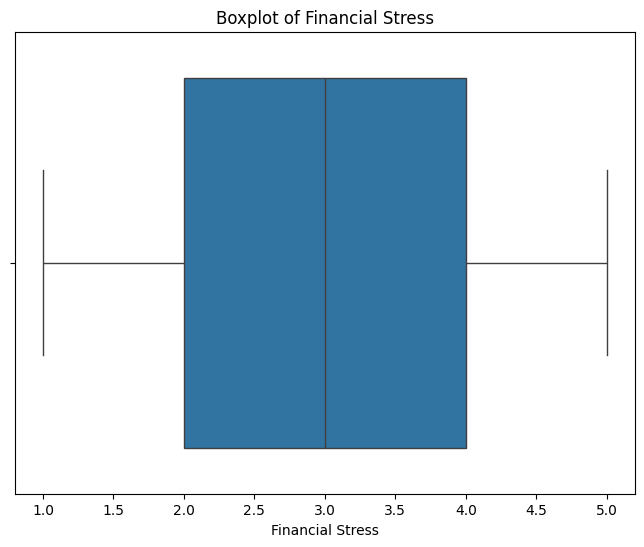

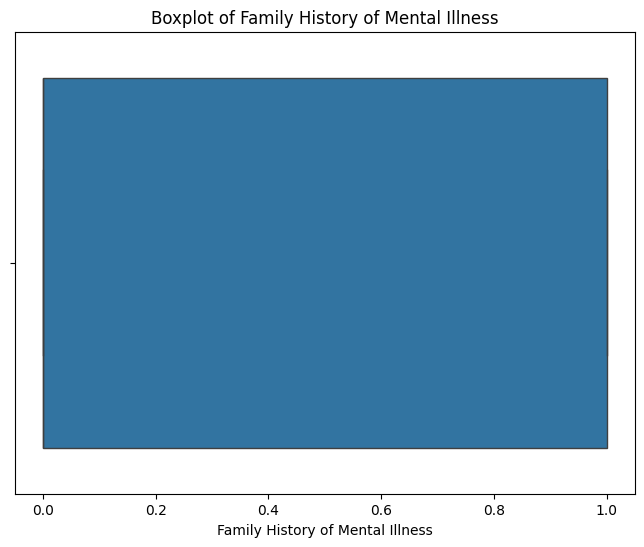

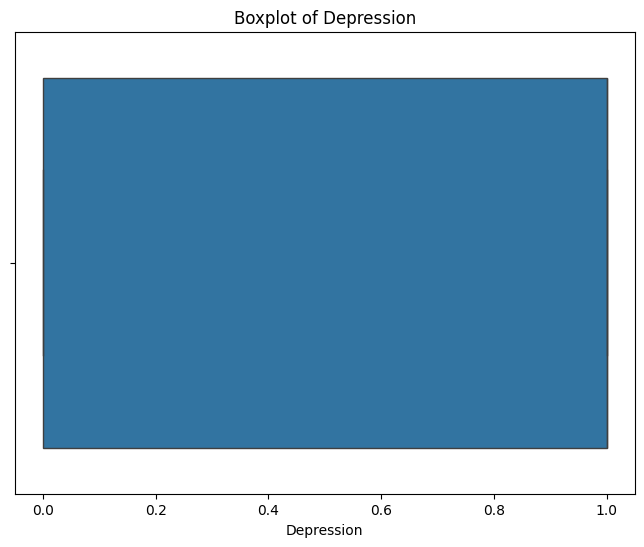

In [ ]:
# Identify numerical columns for outlier detection
numerical_cols = student_data.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=student_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
columns_to_normalize = student_data.columns.difference(['Depression'])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(student_data[columns_to_normalize])

# Create a new DataFrame with the normalized data and the original 'Depression' column
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize, index = student_data.index)
normalized_df['Depression'] = student_data['Depression']

In [ ]:
# Access the 'depression' column and get the value counts.
depression_counts = normalized_df['Depression'].value_counts()
depression_counts

,count
Depression,
1,252
0,250


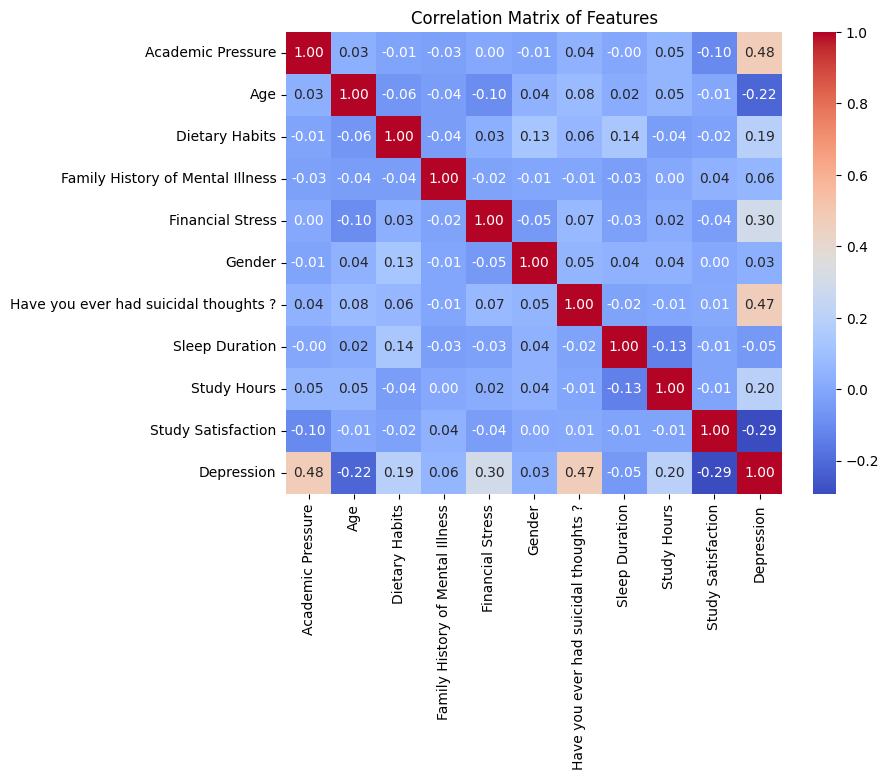

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## **Modeling**

### Logistic Regression


In [ ]:
X = normalized_df.drop('Depression', axis=1)
y = normalized_df['Depression']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        53

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



### Decision Tree

In [ ]:
# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        48
           1       0.86      0.94      0.90        53

    accuracy                           0.89       101
   macro avg       0.90      0.89      0.89       101
weighted avg       0.89      0.89      0.89       101



### Random Forest

In [ ]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.91      0.98      0.95        53

    accuracy                           0.94       101
   macro avg       0.94      0.94      0.94       101
weighted avg       0.94      0.94      0.94       101



### LR vs DT vs RF

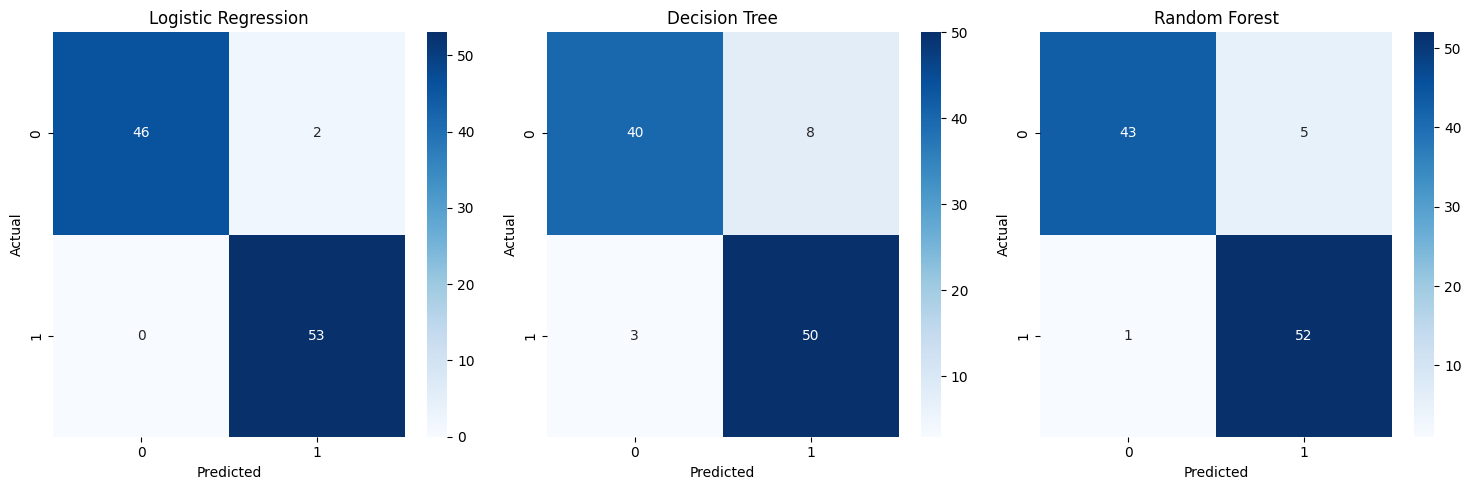

In [ ]:
# Calculate confusion matrices
cm_logreg = confusion_matrix(y_test, y_pred)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot confusion matrices
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

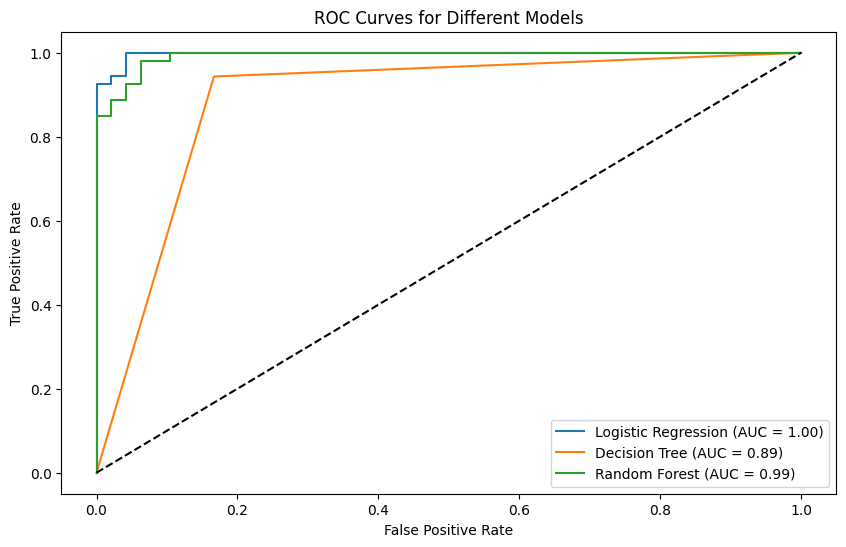

In [ ]:
# Predict probabilities for each model
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC scores
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

Logistic Regression F1-score: 0.9814814814814815
Decision Tree F1-score: 0.9009009009009009
Random Forest F1-score: 0.9454545454545454


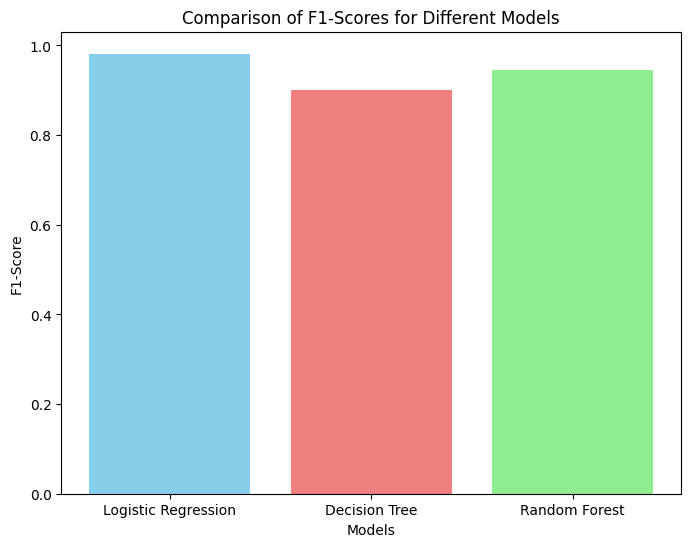

In [ ]:
# F1-scores
f1_logreg = f1_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Logistic Regression F1-score: {f1_logreg}")
print(f"Decision Tree F1-score: {f1_dt}")
print(f"Random Forest F1-score: {f1_rf}")

# Bar plot for F1-scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
f1_scores = [f1_logreg, f1_dt, f1_rf]
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.title("Comparison of F1-Scores for Different Models")
plt.show()